In [25]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from IPython.display import display, HTML

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [28]:
relevant_cols = [
    "edad",
    "imc",
    "f_diag",
    "tipo_histologico",
    "Grado",
    "valor_de_ca125",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "fecha_qx",
    "asa",
    "histo_defin",
    "grado_histologi",
    "tamano_tumoral",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "recep_est_porcent",
    "rece_de_Ppor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "recidiva",
    "rdt",
]

In [29]:
data = pd.read_csv("../data_source/IQ_Cancer_Endometrio_merged_NMS.csv")
data_relevant = data[relevant_cols]
data_relevant.head()

edad    imc      f_diag  tipo_histologico  Grado  valor_de_ca125  \
0  68.0  39.40  2023-11-03                 2      2           283.0   
1  92.0  24.14  2019-10-24                 1      1             NaN   
2  72.0  38.80  2020-07-16                 2      1             NaN   
3  78.0  36.30  2021-02-22                 2      1             NaN   
4  68.0  31.10  2019-11-15                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  \
0              4.0              2.0             1.0              2.0   
1              3.0              4.0             0.0              NaN   
2              3.0              4.0             0.0              0.0   
3              3.0              3.0             0.0              1.0   
4              NaN              3.0             0.0              0.0   

   grupo_riesgo  tto_NA    fecha_qx  asa  histo_defin  grado_histologi  \
0           3.0       0  16/11/2023  2.0          2.0              2.0   
1           1.0       0         NaN  NaN          NaN              NaN   
2           1.0       0  14/09/2020  2.0          2.0              1.0   
3           2.0       0  18/03/2021  1.0          2.0              1.0   
4           1.0       0  13/12/2019  1.0          2.0              1.0   

   tamano_tumoral  afectacion_linf  AP_centinela_pelvico  AP_ganPelv  \
0             NaN              NaN                   4.0         NaN   
1             NaN              NaN                   NaN         NaN   
2             2.0              1.0                   4.0         NaN   
3             7.0              1.0                   4.0         3.0   
4             5.0              0.0                   4.0         NaN   

   AP_glanPaor  recep_est_porcent  rece_de_Ppor  beta_cateninap  \
0          NaN               80.0          10.0             0.0   
1          NaN                NaN           NaN             2.0   
2          NaN                NaN           NaN             0.0   
3          3.0               90.0          90.0             0.0   
4          NaN               90.0          90.0             1.0   

   estudio_genetico_r01  estudio_genetico_r02  estudio_genetico_r03  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   estudio_genetico_r04  estudio_genetico_r05  estudio_genetico_r06  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   estadificacion_  FIGO2023  grupo_de_riesgo_definitivo  bqt   qt  \
0              9.0      14.0                         5.0  0.0  1.0   
1              NaN       NaN                         NaN  NaN  NaN   
2              1.0       1.0                         1.0  0.0  0.0   
3              7.0      11.0                         5.0  1.0  1.0   
4              1.0       1.0                         1.0  0.0  0.0   

   Tributaria_a_Radioterapia  recidiva  rdt  
0                        0.0         0  NaN  
1                        NaN         0  NaN  
2                        0.0         0  NaN  
3                        1.0         1  2.0  
4                        0.0         0  NaN

In [30]:
data_relevant.describe().T

count        mean         std   min    25%   50%  \
edad                        163.0   62.190184   14.524374   0.0  54.00  63.0   
imc                         155.0   30.726258    7.738904  16.7  24.40  29.4   
tipo_histologico            163.0    4.171779   11.696045   1.0   2.00   2.0   
Grado                       163.0    1.190184    0.393656   1.0   1.00   1.0   
valor_de_ca125               21.0  148.671429  324.352458   3.7  19.30  30.1   
ecotv_infiltobj             157.0    3.331210    1.064512   1.0   3.00   4.0   
ecotv_infiltsub             162.0    2.629630    0.848007   1.0   2.00   2.5   
metasta_distan              159.0    0.056604    0.231814   0.0   0.00   0.0   
estadiaje_pre_i             160.0    0.368750    0.732205   0.0   0.00   0.0   
grupo_riesgo                161.0    1.515528    0.725479   1.0   1.00   1.0   
tto_NA                      163.0    0.018405    0.134825   0.0   0.00   0.0   
asa                         144.0    1.194444    0.532546   0.0   1.00   1.0   
histo_defin                 151.0    2.827815    2.128416   1.0   2.00   2.0   
grado_histologi             145.0    1.206897    0.406485   1.0   1.00   1.0   
tamano_tumoral              132.0    3.829924    4.551802   0.0   1.75   3.0   
afectacion_linf             144.0    0.208333    0.407534   0.0   0.00   0.0   
AP_centinela_pelvico        132.0    2.810606    1.808093   0.0   0.00   4.0   
AP_ganPelv                   55.0    0.563636    1.166883   0.0   0.00   0.0   
AP_glanPaor                  32.0    0.656250    1.207754   0.0   0.00   0.0   
recep_est_porcent            91.0   76.329670   27.057574   0.0  70.00  90.0   
rece_de_Ppor                 89.0   69.528090   30.671311   0.0  60.00  80.0   
beta_cateninap              151.0    0.860927    0.902144   0.0   0.00   1.0   
estudio_genetico_r01        154.0    0.045455    0.208979   0.0   0.00   0.0   
estudio_genetico_r02        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r03        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r04        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r05        154.0    0.019481    0.138657   0.0   0.00   0.0   
estudio_genetico_r06        154.0    0.935065    0.247215   0.0   1.00   1.0   
estadificacion_             139.0    2.467626    2.488531   1.0   1.00   1.0   
FIGO2023                    142.0    3.704225    4.073420   1.0   1.00   1.0   
grupo_de_riesgo_definitivo  143.0    1.965035    1.396235   1.0   1.00   1.0   
bqt                         154.0    0.279221    0.450080   0.0   0.00   0.0   
qt                          153.0    0.209150    0.408038   0.0   0.00   0.0   
Tributaria_a_Radioterapia   155.0    0.232258    0.423642   0.0   0.00   0.0   
recidiva                    163.0    0.288344    0.563542   0.0   0.00   0.0   
rdt                          33.0    1.030303    0.529437   0.0   1.00   1.0   

                              75%     max  
edad                        72.00    92.0  
imc                         35.30    56.1  
tipo_histologico             2.00    88.0  
Grado                        1.00     2.0  
valor_de_ca125              93.80  1486.9  
ecotv_infiltobj              4.00     4.0  
ecotv_infiltsub              3.00     4.0  
metasta_distan               0.00     1.0  
estadiaje_pre_i              0.00     2.0  
grupo_riesgo                 2.00     3.0  
tto_NA                       0.00     1.0  
asa                          2.00     2.0  
histo_defin                  2.00     9.0  
grado_histologi              1.00     2.0  
tamano_tumoral               4.00    38.0  
afectacion_linf              0.00     1.0  
AP_centinela_pelvico         4.00     4.0  
AP_ganPelv                   0.00     3.0  
AP_glanPaor                  0.25     3.0  
recep_est_porcent           90.00   100.0  
rece_de_Ppor                90.00   100.0  
beta_cateninap               2.00     2.0  
estudio_genetico_r01         0.00     1.0  
estudio_gen

In [31]:
data_relevant.isnull().sum()

edad                            0
imc                             8
f_diag                          2
tipo_histologico                0
Grado                           0
valor_de_ca125                142
ecotv_infiltobj                 6
ecotv_infiltsub                 1
metasta_distan                  4
estadiaje_pre_i                 3
grupo_riesgo                    2
tto_NA                          0
fecha_qx                       12
asa                            19
histo_defin                    12
grado_histologi                18
tamano_tumoral                 31
afectacion_linf                19
AP_centinela_pelvico           31
AP_ganPelv                    108
AP_glanPaor                   131
recep_est_porcent              72
rece_de_Ppor                   74
beta_cateninap                 12
estudio_genetico_r01            9
estudio_genetico_r02            9
estudio_genetico_r03            9
estudio_genetico_r04            9
estudio_genetico_r05            9
estudio_geneti

In [32]:
len(data_relevant)

163

In [33]:
data_relevant = data_relevant[data_relevant["recidiva"] != 2]
data_relevant = data_relevant[data_relevant["edad"] != 0.0]
data_relevant["recidiva"].isnull().sum()

np.int64(0)

In [34]:
data_relevant.drop(columns=data_relevant.select_dtypes(include=["object"]).columns, inplace=True)

### Mover target

In [35]:
cols = list(data_relevant.columns)
cols.remove("recidiva")
cols.insert(0, "recidiva")
data_relevant = data_relevant.reindex(columns=cols)
data_relevant.head()

recidiva  edad    imc  tipo_histologico  Grado  valor_de_ca125  \
0         0  68.0  39.40                 2      2           283.0   
1         0  92.0  24.14                 1      1             NaN   
2         0  72.0  38.80                 2      1             NaN   
3         1  78.0  36.30                 2      1             NaN   
4         0  68.0  31.10                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  \
0              4.0              2.0             1.0              2.0   
1              3.0              4.0             0.0              NaN   
2              3.0              4.0             0.0              0.0   
3              3.0              3.0             0.0              1.0   
4              NaN              3.0             0.0              0.0   

   grupo_riesgo  tto_NA  asa  histo_defin  grado_histologi  tamano_tumoral  \
0           3.0       0  2.0          2.0              2.0             NaN   
1           1.0       0  NaN          NaN              NaN             NaN   
2           1.0       0  2.0          2.0              1.0             2.0   
3           2.0       0  1.0          2.0              1.0             7.0   
4           1.0       0  1.0          2.0              1.0             5.0   

   afectacion_linf  AP_centinela_pelvico  AP_ganPelv  AP_glanPaor  \
0              NaN                   4.0         NaN          NaN   
1              NaN                   NaN         NaN          NaN   
2              1.0                   4.0         NaN          NaN   
3              1.0                   4.0         3.0          3.0   
4              0.0                   4.0         NaN          NaN   

   recep_est_porcent  rece_de_Ppor  beta_cateninap  estudio_genetico_r01  \
0               80.0          10.0             0.0                   0.0   
1                NaN           NaN             2.0                   0.0   
2                NaN           NaN             0.0                   0.0   
3               90.0          90.0             0.0                   0.0   
4               90.0          90.0             1.0                   0.0   

   estudio_genetico_r02  estudio_genetico_r03  estudio_genetico_r04  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   estudio_genetico_r05  estudio_genetico_r06  estadificacion_  FIGO2023  \
0                   0.0                   1.0              9.0      14.0   
1                   0.0                   1.0              NaN       NaN   
2                   0.0                   1.0              1.0       1.0   
3                   0.0                   1.0              7.0      11.0   
4                   0.0                   1.0              1.0       1.0   

   grupo_de_riesgo_definitivo  bqt   qt  Tributaria_a_Radioterapia  rdt  
0                         5.0  0.0  1.0                        0.0  NaN  
1                         NaN  NaN  NaN                        NaN  NaN  
2                         1.0  0.0  0.0                        0.0  NaN  
3                         5.0  1.0  1.0                        1.0  2.0  
4                         1.0  0.0  0.0                        0.0  NaN

In [36]:
categoricas = [
    "tipo_histologico",
    "Grado",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "asa",
    "histo_defin",
    "grado_histologi",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "rdt",
    "valor_de_ca125_medido",
    "recep_est_porcent_medido",
    "rece_de_Ppor_medido",
    "tamano_tumoral_medido"    
]

In [37]:
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].fillna(5)
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].fillna(4)
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].fillna(4)

data_relevant["estudio_genetico_r01"] = data_relevant["estudio_genetico_r01"].fillna(0)
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].fillna(0)
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].fillna(0)
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].fillna(0)
data_relevant["estudio_genetico_r05"] = data_relevant["estudio_genetico_r05"].fillna(0)
data_relevant["estudio_genetico_r06"] = data_relevant["estudio_genetico_r06"].fillna(0)

data_relevant.loc[data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 0
data_relevant.loc[~data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 1
data_relevant["valor_de_ca125"] = data_relevant["valor_de_ca125"].fillna(35)

data_relevant.loc[data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 0
data_relevant.loc[~data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 1
data_relevant["recep_est_porcent"] = data_relevant["recep_est_porcent"].fillna(0)

data_relevant.loc[data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 0
data_relevant.loc[~data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 1
data_relevant["rece_de_Ppor"] = data_relevant["rece_de_Ppor"].fillna(0)

data_relevant["Tributaria_a_Radioterapia"] = data_relevant["Tributaria_a_Radioterapia"].fillna(2)
data_relevant.loc[(data_relevant["Tributaria_a_Radioterapia"] == 1) | (data_relevant["Tributaria_a_Radioterapia"] == 2), "rdt"] = 4
data_relevant.loc[data_relevant["Tributaria_a_Radioterapia"] == 0, "rdt"] = 3

data_relevant.loc[data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 0
data_relevant.loc[~data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 1
data_relevant["tamano_tumoral"] = data_relevant["tamano_tumoral"].fillna(0)

data_relevant["imc"] = data_relevant["imc"].fillna(data_relevant["imc"].median())

data_relevant["ecotv_infiltobj"] = data_relevant["ecotv_infiltobj"].fillna(5)

data_relevant["metasta_distan"] = data_relevant["metasta_distan"].fillna(2)

data_relevant["estadiaje_pre_i"] = data_relevant["estadiaje_pre_i"].fillna(3)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["asa"] = data_relevant["asa"].fillna(6)

data_relevant["histo_defin"] = data_relevant["histo_defin"].fillna(0)

data_relevant["grado_histologi"] = data_relevant["grado_histologi"].fillna(0)

data_relevant["afectacion_linf"] = data_relevant["afectacion_linf"].fillna(2)

data_relevant["beta_cateninap"] = data_relevant["beta_cateninap"].fillna(2)

data_relevant["estadificacion_"] = data_relevant["estadificacion_"].fillna(0)

data_relevant["FIGO2023"] = data_relevant["FIGO2023"].fillna(0)

data_relevant["grupo_de_riesgo_definitivo"] = data_relevant["grupo_de_riesgo_definitivo"].fillna(0)

data_relevant["bqt"] = data_relevant["bqt"].fillna(2)

data_relevant["qt"] = data_relevant["qt"].fillna(2)

In [38]:
data_relevant[categoricas] = data_relevant[categoricas].astype("category")

data_relevant["tipo_histologico"] = data_relevant["tipo_histologico"].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 88])
data_relevant["FIGO2023"] = data_relevant["FIGO2023"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].cat.set_categories([0, 1, 2, 3])
data_relevant["histo_defin"] = data_relevant["histo_defin"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].cat.set_categories([0, 1, 2, 3, 4, 5])
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].cat.set_categories([0, 1])
data_relevant["estadificacion_"] = data_relevant["estadificacion_"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
data_relevant.head()

recidiva  edad    imc tipo_histologico Grado  valor_de_ca125  \
0         0  68.0  39.40                2     2           283.0   
1         0  92.0  24.14                1     1            35.0   
2         0  72.0  38.80                2     1            35.0   
3         1  78.0  36.30                2     1            35.0   
4         0  68.0  31.10                2     1            35.0   

  ecotv_infiltobj ecotv_infiltsub metasta_distan estadiaje_pre_i grupo_riesgo  \
0             4.0             2.0            1.0             2.0            3   
1             3.0             4.0            0.0             3.0            1   
2             3.0             4.0            0.0             0.0            1   
3             3.0             3.0            0.0             1.0            2   
4             5.0             3.0            0.0             0.0            1   

  tto_NA  asa histo_defin grado_histologi  tamano_tumoral afectacion_linf  \
0      0  2.0           2             2.0             0.0             2.0   
1      0  6.0           0             0.0             0.0             2.0   
2      0  2.0           2             1.0             2.0             1.0   
3      0  1.0           2             1.0             7.0             1.0   
4      0  1.0           2             1.0             5.0             0.0   

  AP_centinela_pelvico AP_ganPelv AP_glanPaor  recep_est_porcent  \
0                    4          4           4               80.0   
1                    5          4           4                0.0   
2                    4          4           4                0.0   
3                    4          3           3               90.0   
4                    4          4           4               90.0   

   rece_de_Ppor beta_cateninap estudio_genetico_r01 estudio_genetico_r02  \
0          10.0            0.0                  0.0                    0   
1           0.0            2.0                  0.0                    0   
2           0.0            0.0                  0.0                    0   
3          90.0            0.0                  0.0                    0   
4          90.0            1.0                  0.0                    0   

  estudio_genetico_r03 estudio_genetico_r04 estudio_genetico_r05  \
0                    0                    0                  0.0   
1                    0                    0                  0.0   
2                    0                    0                  0.0   
3                    0                    0                  0.0   
4                    0                    0                  0.0   

  estudio_genetico_r06 estadificacion_ FIGO2023 grupo_de_riesgo_definitivo  \
0                  1.0               9       14                        5.0   
1                  1.0               0        0                        0.0   
2                  1.0               1        1                        1.0   
3                  1.0               7       11                        5.0   
4                  1.0               1        1                        1.0   

   bqt   qt Tributaria_a_Radioterapia  rdt valor_de_ca125_medido  \
0  0.0  1.0                       0.0  3.0                   1.0   
1  2.0  2.0                       2.0  4.0                   0.0   
2  0.0  0.0                       0.0  3.0                   0.0   
3  1.0  1.0                       1.0  4.0                   0.0   
4  0.0  0.0                       0.0  3.0                   0.0   

  recep_est_porcent_medido rece_de_Ppor_medido tamano_tumoral_medido  
0                      1.0                 1.0                   0.0  
1                      0.0                 0.0                   0.0  
2                      0.0                 0.0                   1.0  
3                      1.0                 1.0                   1.0  
4                      1.0                 1.0                   1.0

In [40]:
cols = data_relevant.columns
X_train, X_test, y_train, y_test = train_test_split(data_relevant[cols[1:]], data_relevant[cols[0]], train_size=0.7, stratify=data_relevant["recidiva"], random_state=1)

In [41]:
X_train.isnull().sum() / len(y_train)

edad                          0.0
imc                           0.0
tipo_histologico              0.0
Grado                         0.0
valor_de_ca125                0.0
ecotv_infiltobj               0.0
ecotv_infiltsub               0.0
metasta_distan                0.0
estadiaje_pre_i               0.0
grupo_riesgo                  0.0
tto_NA                        0.0
asa                           0.0
histo_defin                   0.0
grado_histologi               0.0
tamano_tumoral                0.0
afectacion_linf               0.0
AP_centinela_pelvico          0.0
AP_ganPelv                    0.0
AP_glanPaor                   0.0
recep_est_porcent             0.0
rece_de_Ppor                  0.0
beta_cateninap                0.0
estudio_genetico_r01          0.0
estudio_genetico_r02          0.0
estudio_genetico_r03          0.0
estudio_genetico_r04          0.0
estudio_genetico_r05          0.0
estudio_genetico_r06          0.0
estadificacion_               0.0
FIGO2023      

In [42]:
X_train_ohe = pd.get_dummies(X_train, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_train_ohe.select_dtypes(include=["bool"]).columns
X_train_ohe[cols_ohe] = X_train_ohe[cols_ohe].astype("category")

X_train_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
95  70.0  22.9            93.8             2.0                0.0   
20  55.0  31.2            35.0             1.0               90.0   
81  51.0  31.6            35.0             0.4                0.0   
84  64.0  21.0            35.0             7.5                1.0   
47  66.0  37.3            24.2             2.5                0.0   

    rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
95           0.0               True              False              False   
20          90.0               True              False              False   
81           0.0               True              False              False   
84           0.0              False              False              False   
47           0.0               True              False              False   

   tipo_histologico_5 tipo_histologico_6 tipo_histologico_7  \
95              False              False              False   
20              False              False              False   
81              False              False              False   
84              False              False               True   
47              False              False              False   

   tipo_histologico_8 tipo_histologico_9 tipo_histologico_10  \
95              False              False               False   
20              False              False               False   
81              False              False               False   
84              False              False               False   
47              False              False               False   

   tipo_histologico_11 tipo_histologico_12 tipo_histologico_88 Grado_2  \
95               False               False               False   False   
20               False               False               False   False   
81               False               False               False   False   
84               False               False               False   False   
47               False               False               False   False   

   ecotv_infiltobj_2.0 ecotv_infiltobj_3.0 ecotv_infiltobj_4.0  \
95               False                True               False   
20               False               False               False   
81                True               False               False   
84               False               False                True   
47                True               False               False   

   ecotv_infiltobj_5.0 ecotv_infiltsub_2.0 ecotv_infiltsub_3.0  \
95               False               False                True   
20               False                True               False   
81               False               False               False   
84               False               False                True   
47               False                True               False   

   ecotv_infiltsub_4.0 metasta_distan_1.0 metasta_distan_2.0  \
95               False              False              False   
20               False              False              False   
81                True              False              False   
84               False              False              False   
47               False              False              False   

   estadiaje_pre_i_1.0 estadiaje_pre_i_2.0 estadiaje_pre_i_3.0 grupo_riesgo_1  \
95               False               False               False          False   
20               False               False               False           True   
81               False               False               False           True   
84                True               False               False          False   
47               False               False               False           True   

   grupo_riesgo_2 grupo_riesgo_3 tto_NA_1 asa_1.0 asa_2.0 asa_6.0  \
95           True          False    False    True   False   False   
20          False          False    False    True   False   False   
81          False          False    False   

In [43]:
X_train_ohe.dtypes

edad                               float64
imc                                float64
valor_de_ca125                     float64
tamano_tumoral                     float64
recep_est_porcent                  float64
rece_de_Ppor                       float64
tipo_histologico_2                category
tipo_histologico_3                category
tipo_histologico_4                category
tipo_histologico_5                category
tipo_histologico_6                category
tipo_histologico_7                category
tipo_histologico_8                category
tipo_histologico_9                category
tipo_histologico_10               category
tipo_histologico_11               category
tipo_histologico_12               category
tipo_histologico_88               category
Grado_2                           category
ecotv_infiltobj_2.0               category
ecotv_infiltobj_3.0               category
ecotv_infiltobj_4.0               category
ecotv_infiltobj_5.0               category
ecotv_infil

### Análisis datos

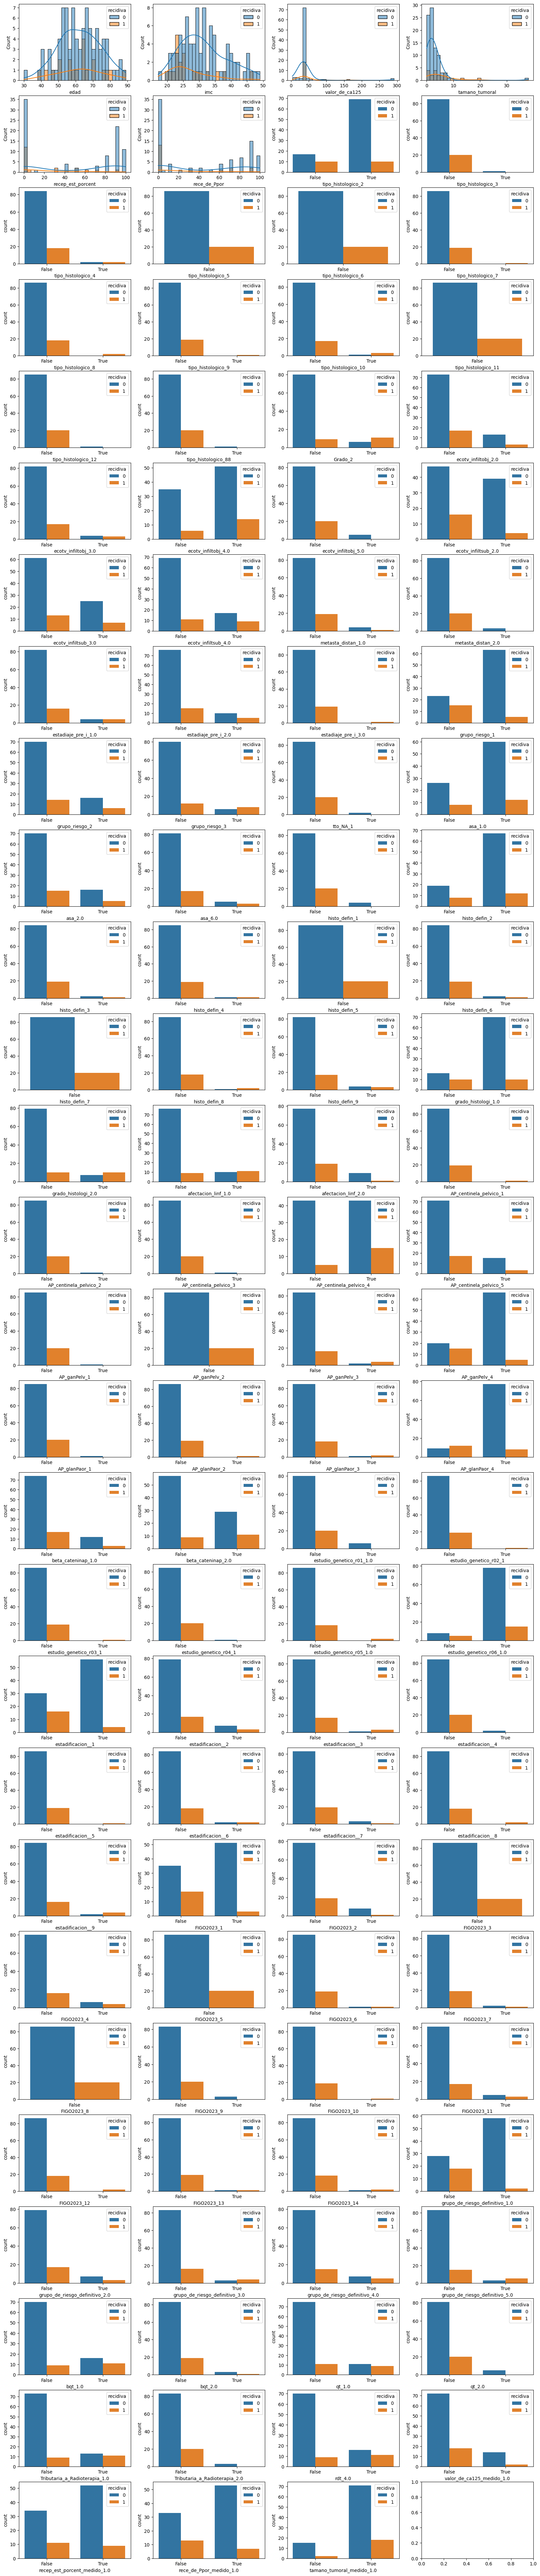

In [44]:
cols = X_train_ohe.columns

fig, axes = plt.subplots(1 + len(cols) // 4, 4, figsize=(20, 100))

for i, val in enumerate(cols):
    ax = axes.flatten()[i]

    if X_train_ohe[val].dtype == "category":
        sns.countplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            ax=ax
        )
    else:
        sns.histplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            bins=30,
            kde=True,
            ax=ax
)
    

In [45]:
std = StandardScaler()

X_train_std = X_train_ohe.copy()
X_train_std[cols] = std.fit_transform(X_train_std[cols])

In [46]:
X_train_std.describe().T

count          mean       std       min  \
edad                            106.0  1.942890e-16  1.004751 -2.656174   
imc                             106.0 -6.954605e-16  1.004751 -1.836259   
valor_de_ca125                  106.0  6.860340e-17  1.004751 -0.987470   
tamano_tumoral                  106.0  8.379042e-18  1.004751 -0.704486   
recep_est_porcent               106.0  5.970067e-17  1.004751 -1.020236   
rece_de_Ppor                    106.0  8.483780e-17  1.004751 -0.949864   
tipo_histologico_2              106.0  1.298751e-16  1.004751 -1.710534   
tipo_histologico_3              106.0  3.639646e-17  1.004751 -0.097590   
tipo_histologico_4              106.0  5.760591e-18  1.004751 -0.198030   
tipo_histologico_5              106.0  0.000000e+00  0.000000  0.000000   
tipo_histologico_6              106.0  0.000000e+00  0.000000  0.000000   
tipo_histologico_7              106.0  5.315455e-17  1.004751 -0.097590   
tipo_histologico_8              106.0 -6.179543e-17  1.004751 -0.138675   
tipo_histologico_9              106.0  3.639646e-17  1.004751 -0.097590   
tipo_histologico_10             106.0  5.760591e-18  1.004751 -0.198030   
tipo_histologico_11             106.0  0.000000e+00  0.000000  0.000000   
tipo_histologico_12             106.0  1.963838e-17  1.004751 -0.097590   
tipo_histologico_88             106.0  3.639646e-17  1.004751 -0.097590   
Grado_2                         106.0  4.294259e-17  1.004751 -0.437048   
ecotv_infiltobj_2.0             106.0 -2.618451e-17  1.004751 -0.421637   
ecotv_infiltobj_3.0             106.0  7.960090e-17  1.004751 -0.265908   
ecotv_infiltobj_4.0             106.0  6.493757e-17  1.004751 -1.259113   
ecotv_infiltobj_5.0             106.0 -4.713211e-17  1.004751 -0.222497   
ecotv_infiltsub_2.0             106.0 -1.466332e-16  1.004751 -0.826160   
ecotv_infiltsub_3.0             106.0  5.236901e-17  1.004751 -0.657596   
ecotv_infiltsub_4.0             106.0  2.094760e-18  1.004751 -0.570088   
metasta_distan_1.0              106.0 -2.618451e-17  1.004751 -0.222497   
metasta_distan_2.0              106.0  1.518701e-17  1.004751 -0.170664   
estadiaje_pre_i_1.0             106.0  6.598495e-17  1.004751 -0.285714   
estadiaje_pre_i_2.0             106.0  2.723189e-17  1.004751 -0.405999   
estadiaje_pre_i_3.0             106.0  5.315455e-17  1.004751 -0.097590   
grupo_riesgo_1                  106.0  1.005485e-16  1.004751 -1.337712   
grupo_riesgo_2                  106.0 -5.236901e-17  1.004751 -0.511766   
grupo_riesgo_3                  106.0  1.256856e-17  1.004751 -0.390095   
tto_NA_1                        106.0 -5.341639e-17  1.004751 -0.138675   
asa_1.0                         106.0  2.932665e-17  1.004751 -1.455214   
asa_2.0                         106.0 -9.845374e-17  1.004751 -0.497050   
asa_6.0                         106.0  5.132163e-17  1.004751 -0.285714   
histo_defin_1                   106.0  2.199498e-17  1.004751 -0.198030   
histo_defin_2                   106.0  1.487280e-16  1.004751 -1.710534   
histo_defin_3                   106.0  3.194510e-17  1.004751 -0.170664   
histo_defin_4                   106.0 -5.341639e-17  1.004751 -0.138675   
histo_defin_5                   106.0  0.000000e+00  0.000000  0.000000   
histo_defin_6                   106.0  6.807971e-18  1.004751 -0.170664   
histo_defin_7                   106.0  0.000000e+00  0.000000  0.000000   
histo_defin_8                   106.0 -3.456355e-17  1.004751 -0.170664   
histo_defin_9                   106.0  3.770569e-17  1.004751 -0.265908   
grado_histologi_1.0             106.0 -1.298751e-16  1.004751 -1.754116   
grado_histologi_2.0             106.0  5.551115e-17  1.004751 -0.437048   
afectacion_linf_1.0             106.0 -9.845374e-17  1.004751 -0.497050   
afectacion_linf_2.0             106.0  2.304236e-17  1.004751 -0.322749   
AP_centinela_pelvico_1          106.0  1.963838e-17  1.004751 -0.097590   
AP_centinela_pelvico_2          106.0  5.315455e-17  1.00

In [47]:
pca_recidiva = PCA().fit(X_train_std[cols]);

print(pca_recidiva.explained_variance_ratio_)
print(pca_recidiva.explained_variance_ratio_.cumsum())

[1.26371798e-01 7.05985297e-02 5.15208870e-02 4.52927732e-02
 4.13800478e-02 3.88868510e-02 3.63535329e-02 3.32936425e-02
 3.24857168e-02 2.88939699e-02 2.84623673e-02 2.72782503e-02
 2.59042845e-02 2.37231282e-02 2.33265835e-02 2.23887001e-02
 2.02117262e-02 1.89723450e-02 1.81590436e-02 1.74508569e-02
 1.63491656e-02 1.54245841e-02 1.49048157e-02 1.40540001e-02
 1.32183058e-02 1.29055561e-02 1.24423782e-02 1.14303892e-02
 1.09927733e-02 1.04492324e-02 9.85689474e-03 8.99017120e-03
 8.56884419e-03 8.33644838e-03 7.45527529e-03 7.07429102e-03
 6.91376149e-03 6.64376613e-03 6.27903667e-03 5.54732589e-03
 5.29111791e-03 4.80763402e-03 4.27244604e-03 4.11560383e-03
 3.88966185e-03 3.65041471e-03 3.57250159e-03 2.94805260e-03
 2.50367107e-03 2.40525614e-03 2.09422875e-03 2.00266472e-03
 1.95117117e-03 1.76408735e-03 1.70732691e-03 1.48228846e-03
 1.43230510e-03 1.34220147e-03 1.09424597e-03 9.80344194e-04
 9.50555751e-04 8.12747598e-04 7.91525209e-04 7.79444217e-04
 6.30974968e-04 6.143148

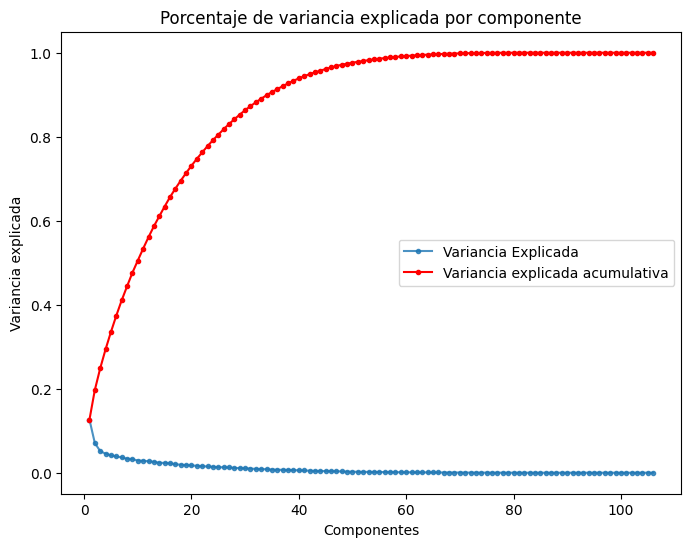

In [48]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),pca_recidiva.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),
         np.cumsum(pca_recidiva.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

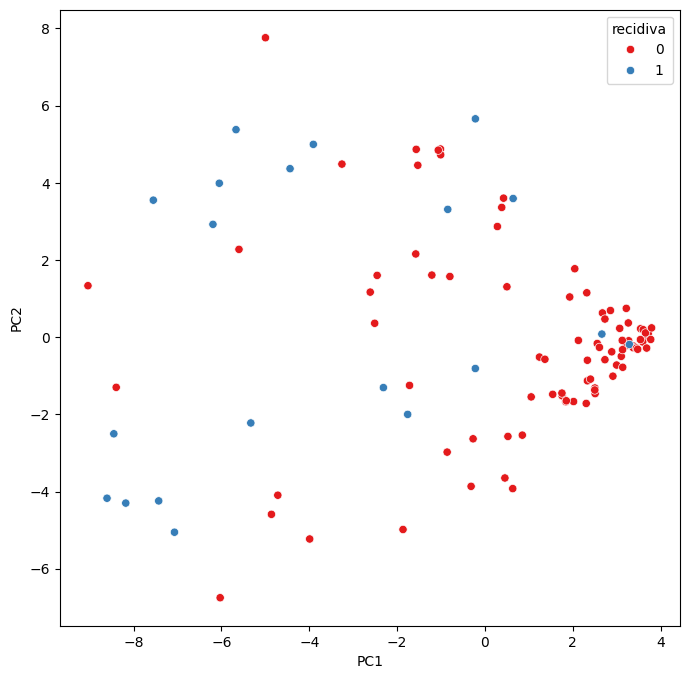

In [49]:
train_pca = pca_recidiva.transform(X_train_std[cols])
X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")

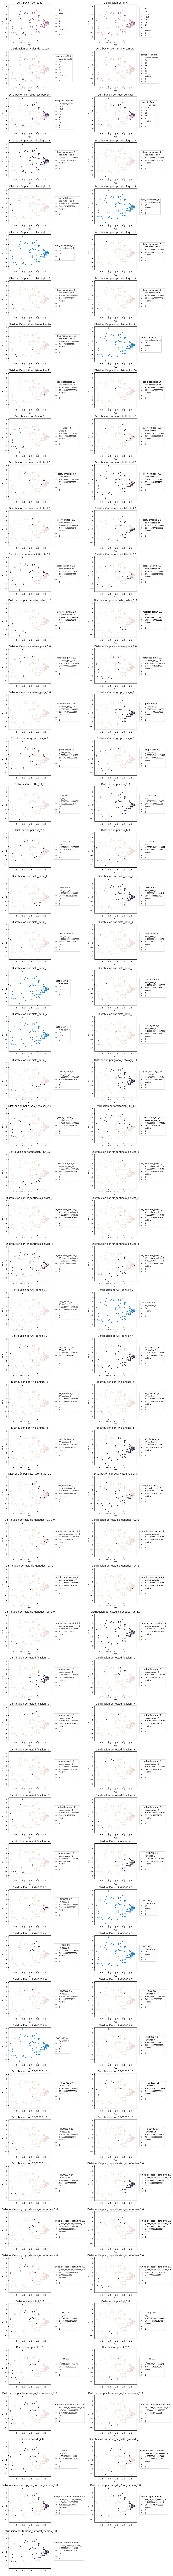

In [50]:
fig, axes = plt.subplots(1 + len(cols) // 2, 2, figsize=(12, 180), constrained_layout=True)

for i, var in enumerate(cols):
    ax = axes.flatten()[i]
    scatter = sns.scatterplot(
        x='PC1', 
        y='PC2', 
        hue=var,
        style=y_train,
        data=X_train_std, 
        ax=ax
    ).set(
        title=f'Distribución por {var}', 
        xlabel='PC1', 
        ylabel='PC2'
    )

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        title=var,
        fontsize='small'
    )

for j in range(len(cols), axes.size):
    fig.delaxes(axes.flatten()[j])

### Entrenamiento

In [51]:
X_test_ohe = pd.get_dummies(X_test, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_test_ohe.select_dtypes(include=["bool"]).columns
X_test_ohe[cols_ohe] = X_test_ohe[cols_ohe].astype("category")

X_test_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
72  74.0  43.0            35.0             2.0               20.0   
43  64.0  26.6            35.0             4.0               90.0   
57  60.0  25.4            35.0             1.5                0.0   
78  77.0  22.8            35.0             3.0               90.0   
25  66.0  37.8            35.0             3.8               90.0   

    rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
72          30.0               True              False              False   
43          90.0               True              False              False   
57           0.0               True              False              False   
78          90.0               True              False              False   
25          90.0               True              False              False   

   tipo_histologico_5 tipo_histologico_6 tipo_histologico_7  \
72              False              False              False   
43              False              False              False   
57              False              False              False   
78              False              False              False   
25              False              False              False   

   tipo_histologico_8 tipo_histologico_9 tipo_histologico_10  \
72              False              False               False   
43              False              False               False   
57              False              False               False   
78              False              False               False   
25              False              False               False   

   tipo_histologico_11 tipo_histologico_12 tipo_histologico_88 Grado_2  \
72               False               False               False   False   
43               False               False               False   False   
57               False               False               False   False   
78               False               False               False   False   
25               False               False               False   False   

   ecotv_infiltobj_2.0 ecotv_infiltobj_3.0 ecotv_infiltobj_4.0  \
72               False               False                True   
43                True               False               False   
57               False               False                True   
78               False               False                True   
25               False               False                True   

   ecotv_infiltobj_5.0 ecotv_infiltsub_2.0 ecotv_infiltsub_3.0  \
72               False                True               False   
43               False                True               False   
57               False                True               False   
78               False               False                True   
25               False                True               False   

   ecotv_infiltsub_4.0 metasta_distan_1.0 metasta_distan_2.0  \
72               False              False              False   
43               False              False              False   
57               False              False              False   
78               False              False              False   
25               False              False              False   

   estadiaje_pre_i_1.0 estadiaje_pre_i_2.0 estadiaje_pre_i_3.0 grupo_riesgo_1  \
72               False               False               False           True   
43               False               False               False           True   
57               False               False               False           True   
78               False                True               False          False   
25               False               False               False           True   

   grupo_riesgo_2 grupo_riesgo_3 tto_NA_1 asa_1.0 asa_2.0 asa_6.0  \
72          False          False    False   False    True   False   
43          False          False    False    True   False   False   
57          False          False    False   

In [52]:
X_test_std = X_test_ohe.copy()
X_test_std[cols] = std.transform(X_test_std[cols])
X_test_std.describe().T

count      mean           std       min  \
edad                             46.0  0.119660  1.090227e+00 -2.409988   
imc                              46.0  0.039069  1.122002e+00 -1.905592   
valor_de_ca125                   46.0  0.857489  5.803827e+00 -0.563010   
tamano_tumoral                   46.0 -0.067323  8.983281e-01 -0.704486   
recep_est_porcent                46.0 -0.015457  1.026916e+00 -1.020236   
rece_de_Ppor                     46.0 -0.023991  1.049686e+00 -0.949864   
tipo_histologico_2               46.0  0.035773  9.898186e-01 -1.710534   
tipo_histologico_3               46.0  0.352173  2.132885e+00 -0.097590   
tipo_histologico_4               46.0 -0.198030  2.806228e-17 -0.198030   
tipo_histologico_5               46.0  0.000000  0.000000e+00  0.000000   
tipo_histologico_6               46.0  0.000000  0.000000e+00  0.000000   
tipo_histologico_7               46.0  0.127291  1.525219e+00 -0.097590   
tipo_histologico_8               46.0  0.180880  1.515411e+00 -0.138675   
tipo_histologico_9               46.0  0.127291  1.525219e+00 -0.097590   
tipo_histologico_10              46.0 -0.198030  2.806228e-17 -0.198030   
tipo_histologico_11              46.0  0.000000  0.000000e+00  0.000000   
tipo_histologico_12              46.0 -0.097590  4.209341e-17 -0.097590   
tipo_histologico_88              46.0  0.127291  1.525219e+00 -0.097590   
Grado_2                          46.0  0.214612  1.175254e+00 -0.437048   
ecotv_infiltobj_2.0              46.0 -0.118013  8.790557e-01 -0.421637   
ecotv_infiltobj_3.0              46.0  0.084232  1.147120e+00 -0.265908   
ecotv_infiltobj_4.0              46.0  0.213923  9.347613e-01 -1.259113   
ecotv_infiltobj_5.0              46.0 -0.119955  6.954746e-01 -0.222497   
ecotv_infiltsub_2.0              46.0  0.324951  1.020746e+00 -0.826160   
ecotv_infiltsub_3.0              46.0 -0.041993  9.916502e-01 -0.657596   
ecotv_infiltsub_4.0              46.0 -0.469035  4.792150e-01 -0.570088   
metasta_distan_1.0               46.0  0.187671  1.343785e+00 -0.222497   
metasta_distan_2.0               46.0 -0.039574  8.890941e-01 -0.170664   
estadiaje_pre_i_1.0              46.0 -0.203416  5.581731e-01 -0.285714   
estadiaje_pre_i_2.0              46.0  0.092968  1.099490e+00 -0.405999   
estadiaje_pre_i_3.0              46.0  0.352173  2.132885e+00 -0.097590   
grupo_riesgo_1                   46.0 -0.113757  1.038085e+00 -1.337712   
grupo_riesgo_2                   46.0  0.185085  1.122531e+00 -0.511766   
grupo_riesgo_3                   46.0 -0.004846  1.005700e+00 -0.390095   
tto_NA_1                         46.0  0.021103  1.083666e+00 -0.138675   
asa_1.0                          46.0 -0.430589  1.082012e+00 -1.455214   
asa_2.0                          46.0  0.266534  1.167187e+00 -0.497050   
asa_6.0                          46.0  0.290373  1.374814e+00 -0.285714   
histo_defin_1                    46.0 -0.083947  7.737432e-01 -0.198030   
histo_defin_2                    46.0  0.085668  9.571423e-01 -1.710534   
histo_defin_3                    46.0 -0.039574  8.890941e-01 -0.170664   
histo_defin_4                    46.0 -0.138675  5.612455e-17 -0.138675   
histo_defin_5                    46.0  0.000000  0.000000e+00  0.000000   
histo_defin_6                    46.0 -0.170664  2.806228e-17 -0.170664   
histo_defin_7                    46.0  0.021739  1.474420e-01  0.000000   
histo_defin_8                    46.0 -0.039574  8.890941e-01 -0.170664   
histo_defin_9                    46.0 -0.090838  8.302242e-01 -0.265908   
grado_histologi_1.0              46.0 -0.238331  1.119205e+00 -1.754116   
grado_histologi_2.0              46.0  0.155370  1.136456e+00 -0.437048   
afectacion_linf_1.0              46.0 -0.115258  9.111354e-01 -0.497050   
afectacion_linf_2.0              46.0  0.123486  1.164906e+00 -0.322749   
AP_centinela_pelvico_1           46.0  0.127291  1.525219e+00 -0.097590   
AP_centinela_pelvico_2           46.0 -0.097590  4.209341

In [53]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [54]:
norm = MinMaxScaler()
X_train_norm = X_train_ohe.copy()
X_train_norm[cols] = norm.fit_transform(X_train_norm[cols])
X_train_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
95  0.677966  0.179245        0.313282        0.052632               0.00   
20  0.423729  0.440252        0.108832        0.026316               0.90   
81  0.355932  0.452830        0.108832        0.010526               0.00   
84  0.576271  0.119497        0.108832        0.197368               0.01   
47  0.610169  0.632075        0.071280        0.065789               0.00   

    rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
95           0.0                 1.0                 0.0                 0.0   
20           0.9                 1.0                 0.0                 0.0   
81           0.0                 1.0                 0.0                 0.0   
84           0.0                 0.0                 0.0                 0.0   
47           0.0                 1.0                 0.0                 0.0   

    tipo_histologico_5  tipo_histologico_6  tipo_histologico_7  \
95                 0.0                 0.0                 0.0   
20                 0.0                 0.0                 0.0   
81                 0.0                 0.0                 0.0   
84                 0.0                 0.0                 1.0   
47                 0.0                 0.0                 0.0   

    tipo_histologico_8  tipo_histologico_9  tipo_histologico_10  \
95                 0.0                 0.0                  0.0   
20                 0.0                 0.0                  0.0   
81                 0.0                 0.0                  0.0   
84                 0.0                 0.0                  0.0   
47                 0.0                 0.0                  0.0   

    tipo_histologico_11  tipo_histologico_12  tipo_histologico_88  Grado_2  \
95                  0.0                  0.0                  0.0      0.0   
20                  0.0                  0.0                  0.0      0.0   
81                  0.0                  0.0                  0.0      0.0   
84                  0.0                  0.0                  0.0      0.0   
47                  0.0                  0.0                  0.0      0.0   

    ecotv_infiltobj_2.0  ecotv_infiltobj_3.0  ecotv_infiltobj_4.0  \
95                  0.0                  1.0                  0.0   
20                  0.0                  0.0                  0.0   
81                  1.0                  0.0                  0.0   
84                  0.0                  0.0                  1.0   
47                  1.0                  0.0                  0.0   

    ecotv_infiltobj_5.0  ecotv_infiltsub_2.0  ecotv_infiltsub_3.0  \
95                  0.0                  0.0                  1.0   
20                  0.0                  1.0                  0.0   
81                  0.0                  0.0                  0.0   
84                  0.0                  0.0                  1.0   
47                  0.0                  1.0                  0.0   

    ecotv_infiltsub_4.0  metasta_distan_1.0  metasta_distan_2.0  \
95                  0.0                 0.0                 0.0   
20                  0.0                 0.0                 0.0   
81                  1.0                 0.0                 0.0   
84                  0.0                 0.0                 0.0   
47                  0.0                 0.0                 0.0   

    estadiaje_pre_i_1.0  estadiaje_pre_i_2.0  estadiaje_pre_i_3.0  \
95                  0.0                  0.0                  0.0   
20                  0.0                  0.0                  0.0   
81                  0.0                  0.0                  0.0   
84                  1.0                  0.0                  0.0   
47                  0.0                  0.0                  0.0   

    grupo_riesgo_1  grupo_riesgo_2  grupo_riesgo_3  tto_NA_1  asa_1.0  \
95             0.0             1.0             0.0       0.0      1.0   
2

In [55]:
X_test_norm = X_test_ohe.copy()
X_test_norm[cols] = norm.transform(X_test_norm[cols])
X_test_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
72  0.745763  0.811321        0.108832        0.052632                0.2   
43  0.576271  0.295597        0.108832        0.105263                0.9   
57  0.508475  0.257862        0.108832        0.039474                0.0   
78  0.796610  0.176101        0.108832        0.078947                0.9   
25  0.610169  0.647799        0.108832        0.100000                0.9   

    rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
72           0.3                 1.0                 0.0                 0.0   
43           0.9                 1.0                 0.0                 0.0   
57           0.0                 1.0                 0.0                 0.0   
78           0.9                 1.0                 0.0                 0.0   
25           0.9                 1.0                 0.0                 0.0   

    tipo_histologico_5  tipo_histologico_6  tipo_histologico_7  \
72                 0.0                 0.0                 0.0   
43                 0.0                 0.0                 0.0   
57                 0.0                 0.0                 0.0   
78                 0.0                 0.0                 0.0   
25                 0.0                 0.0                 0.0   

    tipo_histologico_8  tipo_histologico_9  tipo_histologico_10  \
72                 0.0                 0.0                  0.0   
43                 0.0                 0.0                  0.0   
57                 0.0                 0.0                  0.0   
78                 0.0                 0.0                  0.0   
25                 0.0                 0.0                  0.0   

    tipo_histologico_11  tipo_histologico_12  tipo_histologico_88  Grado_2  \
72                  0.0                  0.0                  0.0      0.0   
43                  0.0                  0.0                  0.0      0.0   
57                  0.0                  0.0                  0.0      0.0   
78                  0.0                  0.0                  0.0      0.0   
25                  0.0                  0.0                  0.0      0.0   

    ecotv_infiltobj_2.0  ecotv_infiltobj_3.0  ecotv_infiltobj_4.0  \
72                  0.0                  0.0                  1.0   
43                  1.0                  0.0                  0.0   
57                  0.0                  0.0                  1.0   
78                  0.0                  0.0                  1.0   
25                  0.0                  0.0                  1.0   

    ecotv_infiltobj_5.0  ecotv_infiltsub_2.0  ecotv_infiltsub_3.0  \
72                  0.0                  1.0                  0.0   
43                  0.0                  1.0                  0.0   
57                  0.0                  1.0                  0.0   
78                  0.0                  0.0                  1.0   
25                  0.0                  1.0                  0.0   

    ecotv_infiltsub_4.0  metasta_distan_1.0  metasta_distan_2.0  \
72                  0.0                 0.0                 0.0   
43                  0.0                 0.0                 0.0   
57                  0.0                 0.0                 0.0   
78                  0.0                 0.0                 0.0   
25                  0.0                 0.0                 0.0   

    estadiaje_pre_i_1.0  estadiaje_pre_i_2.0  estadiaje_pre_i_3.0  \
72                  0.0                  0.0                  0.0   
43                  0.0                  0.0                  0.0   
57                  0.0                  0.0                  0.0   
78                  0.0                  1.0                  0.0   
25                  0.0                  0.0                  0.0   

    grupo_riesgo_1  grupo_riesgo_2  grupo_riesgo_3  tto_NA_1  asa_1.0  \
72             1.0             0.0             0.0       0.0      0.0   
4

In [56]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_norm, y_train);

In [57]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [58]:
X_test_norm.columns == X_train_norm.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

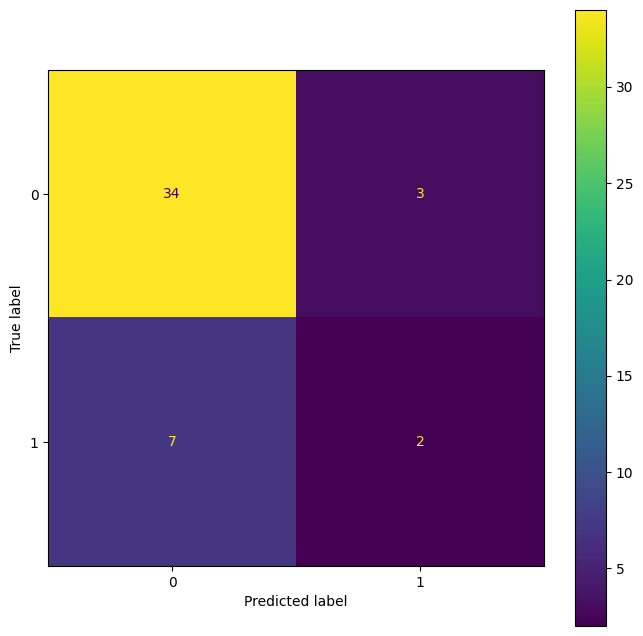

In [59]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_norm, y_test, ax=plt.subplot());

Coefs:


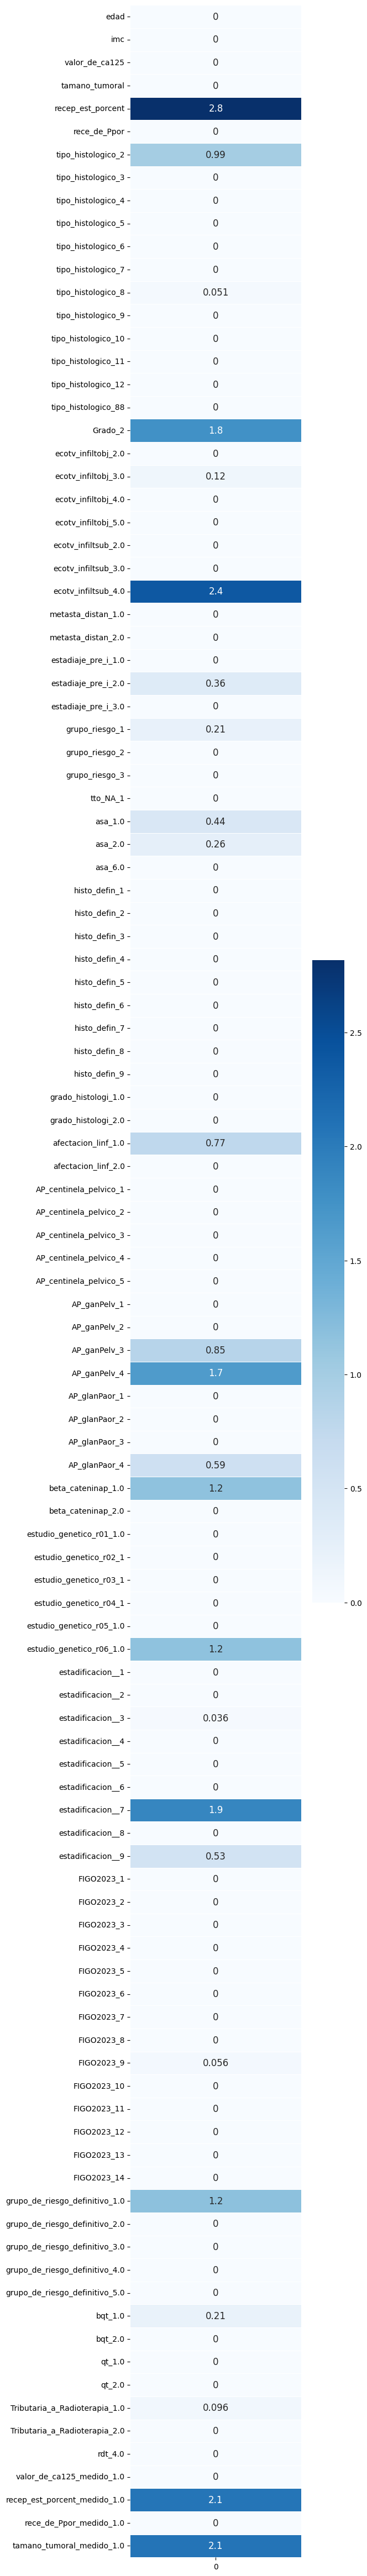

In [60]:
print('Coefs:')
coefs = pd.DataFrame(logistic_model.coef_)
coefs.columns = X_train_norm.columns

plt.figure(figsize=(5,60));
sns.heatmap(coefs.abs().T,annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [61]:
rfecv = RFECV(estimator=logistic_model, step=1, cv=StratifiedKFold(3), scoring="accuracy", n_jobs=-1)
rfecv.fit(X_train_norm, y_train)

print("Número óptimo de características: ", rfecv.n_features_)
print("Mejores características: ", rfecv.support_)

Número óptimo de características:  13
Mejores características:  [False False False False  True False  True False False False False False
 False False False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False  True  True False False False False False False  True
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
  True False  True]


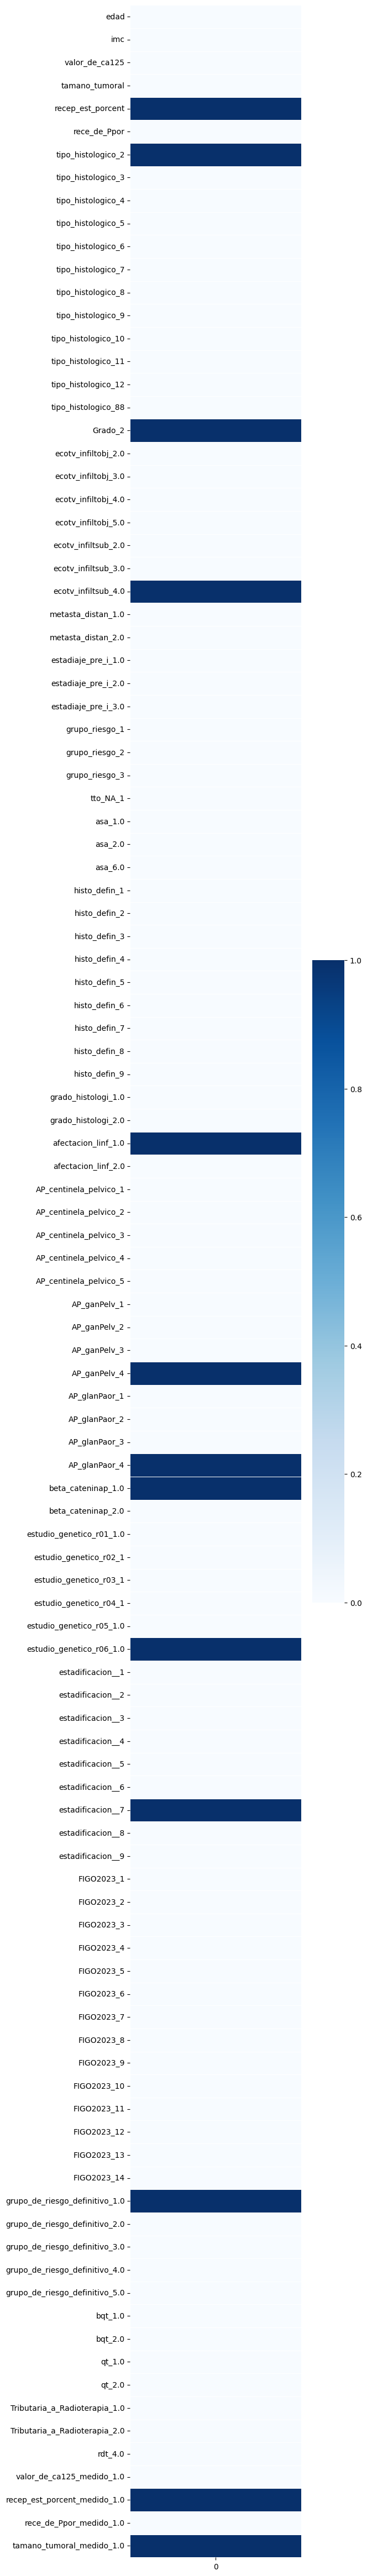

In [62]:
figure = plt.figure(figsize=(5, 60))
sns.heatmap(np.array([rfecv.support_]).T, linewidths=.5, yticklabels=cols, cmap='Blues', annot_kws={'size':12});

In [63]:
X_train_elim = X_train_norm.loc[:, rfecv.support_]
X_test_elim = X_test_norm.loc[:, rfecv.support_]
X_train_elim.describe().T

count      mean       std  min   25%  50%  \
recep_est_porcent               106.0  0.432642  0.426075  0.0  0.00  0.4   
tipo_histologico_2              106.0  0.745283  0.437772  0.0  0.25  1.0   
Grado_2                         106.0  0.160377  0.368699  0.0  0.00  0.0   
ecotv_infiltsub_4.0             106.0  0.245283  0.432299  0.0  0.00  0.0   
afectacion_linf_1.0             106.0  0.198113  0.400471  0.0  0.00  0.0   
AP_ganPelv_4                    106.0  0.669811  0.472515  0.0  0.00  1.0   
AP_glanPaor_4                   106.0  0.801887  0.400471  0.0  1.00  1.0   
beta_cateninap_1.0              106.0  0.141509  0.350202  0.0  0.00  0.0   
estudio_genetico_r06_1.0        106.0  0.877358  0.329584  0.0  1.00  1.0   
estadificacion__7               106.0  0.037736  0.191462  0.0  0.00  0.0   
grupo_de_riesgo_definitivo_1.0  106.0  0.566038  0.497974  0.0  0.00  1.0   
recep_est_porcent_medido_1.0    106.0  0.575472  0.496619  0.0  0.00  1.0   
tamano_tumoral_medido_1.0       106.0  0.839623  0.368699  0.0  1.00  1.0   

                                75%  max  
recep_est_porcent               0.9  1.0  
tipo_histologico_2              1.0  1.0  
Grado_2                         0.0  1.0  
ecotv_infiltsub_4.0             0.0  1.0  
afectacion_linf_1.0             0.0  1.0  
AP_ganPelv_4                    1.0  1.0  
AP_glanPaor_4                   1.0  1.0  
beta_cateninap_1.0              0.0  1.0  
estudio_genetico_r06_1.0        1.0  1.0  
estadificacion__7               0.0  1.0  
grupo_de_riesgo_definitivo_1.0  1.0  1.0  
recep_est_porcent_medido_1.0    1.0  1.0  
tamano_tumoral_medido_1.0       1.0  1.0

In [64]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_elim, y_train);

In [65]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

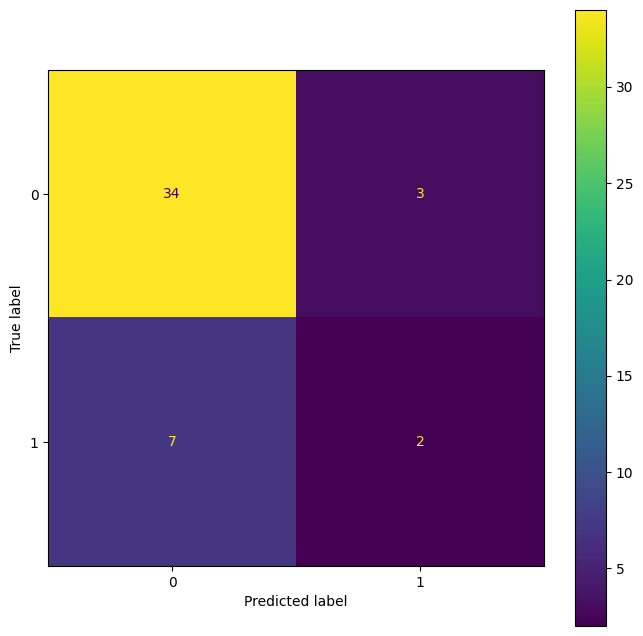

In [66]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_elim, y_test, ax=plt.subplot());

In [67]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_norm, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [68]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

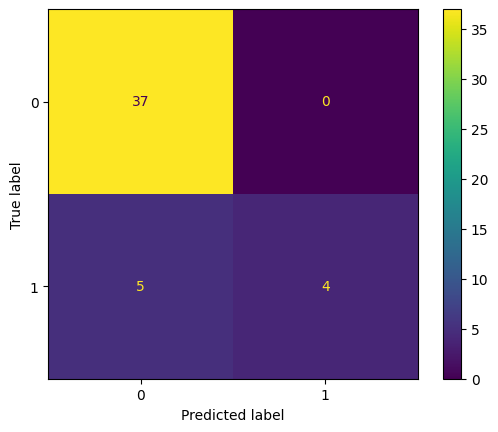

In [69]:
model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [70]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_elim, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [71]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

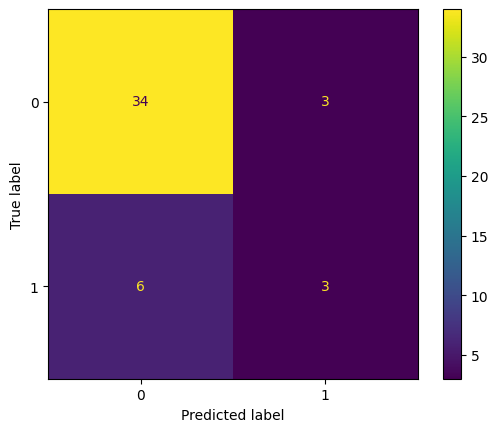

In [72]:
model_rf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_elim, y_test, ax=plt.subplot());

In [73]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf', "poly", "sigmoid"],

    'degree': [2, 3, 4],

    'class_weight': ["balanced", None]
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_norm, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, g

In [74]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

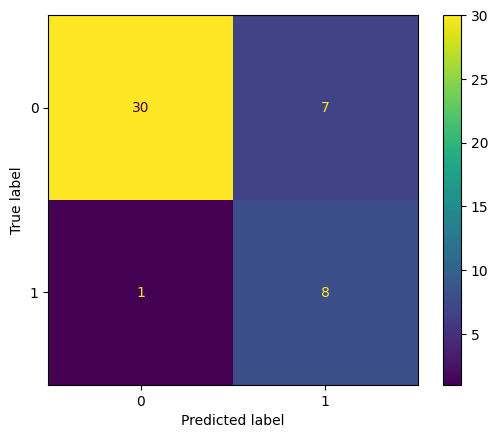

In [75]:
model_rf = SVC(C=1, gamma=0.1, kernel="sigmoid", class_weight="balanced", degree=3, probability=True, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [76]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf'] 
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='accuracy',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_elim, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV

In [77]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [78]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [79]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

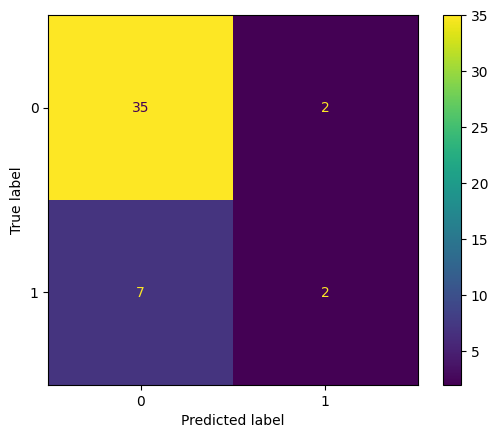

In [80]:
model_rf = RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_std[["PC1", "PC2", "PC3"]], y_test, ax=plt.subplot());

In [81]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [82]:
def random_forest_test(X_train_func, y_train_func):
    # 1. Definir la cuadrícula de hiperparámetros a probar
    # Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
    param_grid = {
        # Número de árboles en el bosque
        'n_estimators': [100, 200, 300], 
        
        # Profundidad máxima de cada árbol
        'max_depth': [None, 10, 20], 
        
        # Número mínimo de muestras requeridas para dividir un nodo interno
        'min_samples_split': [2, 5], 
        
        # Número mínimo de muestras requeridas en cada nodo hoja
        'min_samples_leaf': [1, 2],
        
        # Función para medir la calidad de una división
        'criterion': ['gini', 'entropy']
    }

    # 2. Inicializar el modelo base
    base_model = RandomForestClassifier(random_state=42)

    # 3. Inicializar el GridSearchCV
    grid_search = GridSearchCV(
        estimator=base_model,      # El modelo que queremos optimizar
        param_grid=param_grid,     # El diccionario de hiperparámetros
        scoring='f1',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
        cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
        verbose=0,                 # Nivel de detalle de la salida (2 es bueno)
        n_jobs=-1                 # Usar todos los núcleos del procesador para acelerar
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula...")
    grid_search.fit(X_train_func, y_train_func)

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]

    

In [83]:
def svm_test(X_train_func, y_train_func):
    param_grid = {
        # Coeficiente de regularización C (potencias de 10)
        'C': [0.1, 1, 10, 100], 
        
        # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
        'gamma': [0.001, 0.01, 0.1, 'scale'], 
        
        # Tipo de kernel a probar
        'kernel': ['rbf', "poly", "sigmoid"],

        'degree': [1, 2, 3],

        'class_weight': ["balanced", None]
    }

    svm_model = SVC(random_state=42, probability=True)

    # 3. Inicializar el GridSearchCV
    grid_search_svm = GridSearchCV(
        estimator=svm_model,        # Le pasamos el Pipeline
        param_grid=param_grid,     
        scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
        cv=5,                      
        verbose=0,                 
        n_jobs=-1              
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula para SVM...")
    # Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
    grid_search_svm.fit(X_train_func, y_train_func) 

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]


Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
2 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
3 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
4 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
5 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
6 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
7 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
8 componentes

KeyboardInterrupt: 

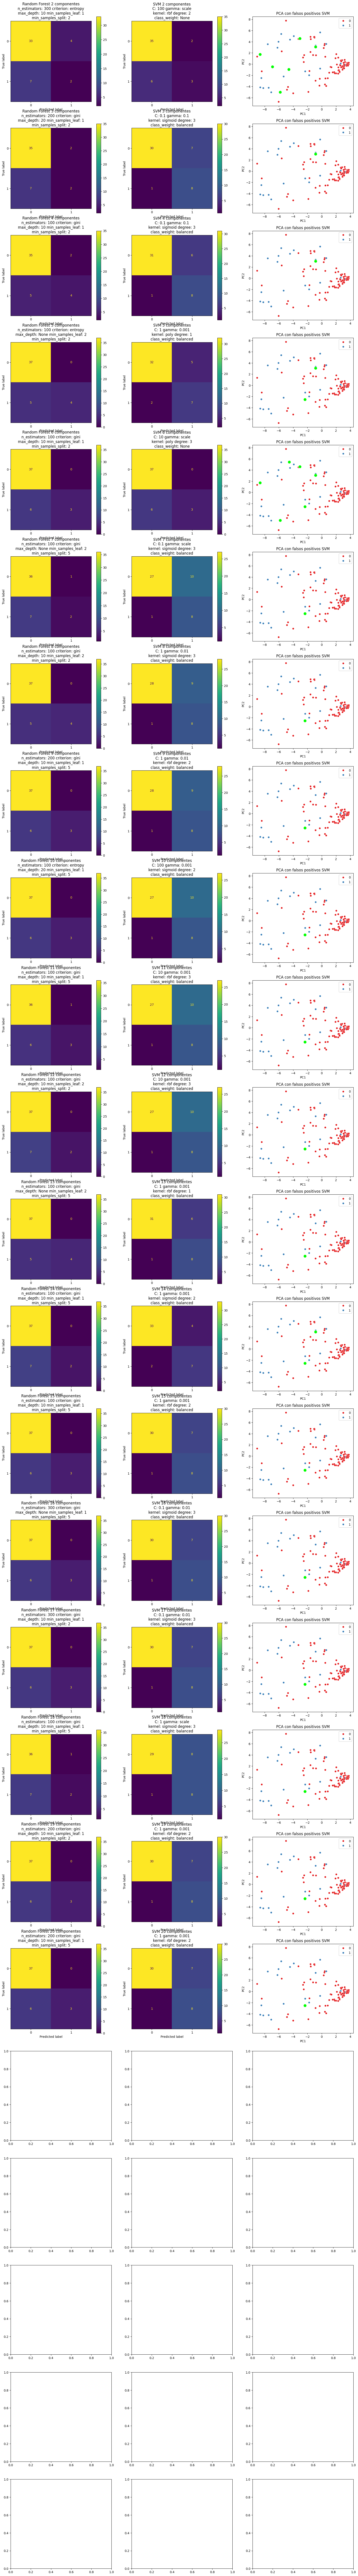

In [84]:
fig, axes = plt.subplots(24, 3, figsize=(20, 150))

counter_iguales = {}

for i in range(2, 26):
    ax_rf = axes[i - 2][0]
    ax_svm = axes[i - 2][1]
    ax_pca = axes[i - 2][2]

    params_rf = random_forest_test(train_pca[:, :i], y_train)
    ax_rf.set_title(f"Random Forest {i} componentes\nn_estimators: {params_rf["n_estimators"]} criterion: {params_rf["criterion"]}\nmax_depth: {params_rf["max_depth"]} min_samples_leaf: {params_rf["min_samples_leaf"]}\nmin_samples_split: {params_rf["min_samples_split"]}")

    params_svm = svm_test(train_pca[:, :i], y_train)
    ax_svm.set_title(f"SVM {i} componentes\nC: {params_svm["C"]} gamma: {params_svm["gamma"]}\nkernel: {params_svm["kernel"]} degree: {params_svm["degree"]}\nclass_weight: {params_svm["class_weight"]}")

    ax_pca.set_title("PCA con falsos positivos SVM")

    print(f"{i} componentes ready.")

    model_rf = RandomForestClassifier(n_estimators=params_rf["n_estimators"], criterion=params_rf["criterion"], max_depth=params_rf["max_depth"], min_samples_leaf=params_rf["min_samples_leaf"], min_samples_split=params_rf["min_samples_split"], random_state=42)
    model_rf.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_rf, test_pca[:, :i], y_test, ax=ax_rf);

    model_svm = SVC(C=params_svm["C"], gamma=params_svm["gamma"], kernel=params_svm["kernel"], degree=params_svm["degree"], class_weight=params_svm["class_weight"], probability=True, random_state=42)
    model_svm.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_svm, test_pca[:, :i], y_test, ax=ax_svm);

    y_pred = model_svm.predict(test_pca[:, :i])

    y_test_series = pd.Series(y_test, index=X_test.index)
    y_pred_series = pd.Series(y_pred, index=X_test.index)

    es_falso_positivo = (y_test_series == 1) & (y_pred_series == 0)

    df_falsos_positivos = pd.DataFrame(test_pca[:, :14][es_falso_positivo])

    _ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1", ax=ax_pca)
    _ = sns.scatterplot(x=0, y=1, data=df_falsos_positivos, color="lime", s=100, ax=ax_pca)

    X_reconstr = pd.DataFrame(pca_recidiva.inverse_transform(df_falsos_positivos))
    X_reconstr.columns = cols

    error = 0.0001
    error_df = abs(X_reconstr.iloc[0] - X_reconstr.iloc[1]) < error

    for l in list(error_df[error_df]):
        if l not in counter_iguales.key():
            counter_iguales[l] = 1
        else:
            counter_iguales[l] += 1
    

In [ ]:
model_svm = SVC(C=1, gamma=0.001, kernel="sigmoid", degree=2, class_weight="balanced", probability=True, random_state=42)
model_svm.fit(train_pca[:, :14], y_train)


SVC(C=1, class_weight='balanced', degree=2, gamma=0.001, kernel='sigmoid',
    probability=True, random_state=42)

In [ ]:
y_pred = model_svm.predict(test_pca[:, :14])

In [ ]:
y_test_series = pd.Series(y_test, index=X_test.index)
y_pred_series = pd.Series(y_pred, index=X_test.index)

es_falso_positivo = (y_test_series == 1) & (y_pred_series == 0)

df_falsos_positivos = pd.DataFrame(test_pca[es_falso_positivo])

print(f"Número de Falsos Positivos encontrados: {df_falsos_positivos.shape[0]}")
print("\nPrimeros 5 Falsos Positivos:")
print(df_falsos_positivos.head())

Número de Falsos Positivos encontrados: 2

Primeros 5 Falsos Positivos:
        0         1         2         3         4         5         6    \
0 -0.865194  3.062010 -0.160704  0.686313 -2.252595 -1.318871  2.017396   
1 -2.347767 -2.542144 -2.735506  2.767514 -0.597772 -0.893198  0.415554   

        7         8         9    ...           96            97   \
0  0.722836 -1.041437  0.031116  ... -1.069115e-15  2.686299e-15   
1 -1.664589 -2.431235  0.312110  ...  5.298059e-01 -1.606573e+00   

            98            99            100           101           102  \
0 -5.918859e-16  2.438853e-15 -4.920368e-18 -1.710320e-15  1.687847e-15   
1  1.022258e+00 -1.646536e+00  6.824487e-01  9.051985e-01  3.792044e-01   

            103           104           105  
0 -3.039806e-16  1.763290e-15  3.550473e-16  
1 -1.251436e-01  5.361270e-01 -4.456606e-01  

[2 rows x 106 columns]


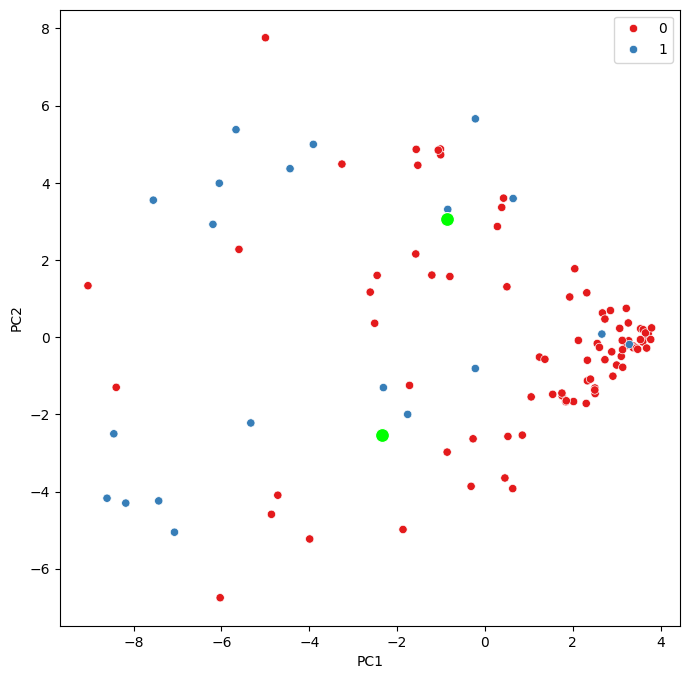

In [ ]:
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")
_ = sns.scatterplot(x=0, y=1, data=df_falsos_positivos, color="lime", s=100)

In [ ]:
X_reconstr = pd.DataFrame(pca_recidiva.inverse_transform(df_falsos_positivos))
X_reconstr.columns = cols

error = 0.0001
error_df = abs(X_reconstr.iloc[0] - X_reconstr.iloc[1]) < error

error_df[error_df]

edad                        True
tipo_histologico_2          True
tipo_histologico_4          True
ecotv_infiltobj_2.0         True
ecotv_infiltobj_4.0         True
ecotv_infiltobj_5.0         True
ecotv_infiltsub_3.0         True
ecotv_infiltsub_4.0         True
estadiaje_pre_i_2.0         True
histo_defin_2               True
histo_defin_6               True
afectacion_linf_1.0         True
AP_centinela_pelvico_2      True
AP_ganPelv_3                True
beta_cateninap_1.0          True
estudio_genetico_r01_1.0    True
estudio_genetico_r04_1      True
estudio_genetico_r06_1.0    True
estadificacion__1           True
estadificacion__2           True
FIGO2023_5                  True
FIGO2023_8                  True
bqt_1.0                     True
qt_1.0                      True
qt_2.0                      True
dtype: bool